In [239]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [240]:
# Read in the nopile Prize data
nopile = pd.read_csv('nopile.csv')

In [241]:
# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nopile['sex'].value_counts().index[0]
top_country = nopile['birth_country'].value_counts().index[0]
print("\n The gender with the most nopile laureates is :", top_gender)
print(" The most common birth country of nopile laureates is :", top_country)


 The gender with the most nopile laureates is : Male
 The most common birth country of nopile laureates is : United States of America


In [242]:
# Calculate the proportion of USA born winners per decade
nopile['usa_born_winner'] = nopile['birth_country'] == 'United States of America'
nopile['decade'] = (np.floor(nopile['year'] / 10) * 10).astype(int)
prop_usa_winners = nopile.groupby('decade', as_index=False)['usa_born_winner'].mean()

In [243]:
# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

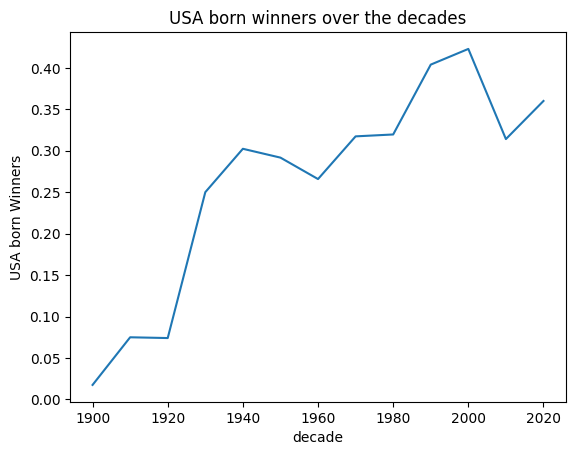

In [244]:
#Plotting USA born winners
sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)
plt.title('USA born winners over the decades')
plt.ylabel('USA born Winners')
plt.show()

In [245]:
# Calculating the proportion of female laureates per decade
nopile['female_winner'] = nopile['sex'] == 'Female'
prop_female_winners = nopile.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

In [246]:
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

In [247]:
# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
print(max_female_dict)

{np.int64(2020): 'Literature'}


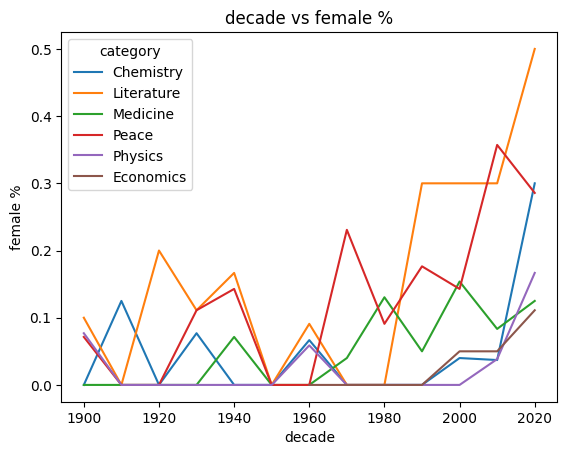

In [248]:
# Plotting female winners with % winners on the y-axis
sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)
plt.title('decade vs female %')
plt.ylabel('female %')
plt.show()

In [256]:
# Finding the first woman to win a nopile Prize
nopile_women = nopile[nopile['female_winner']]
min_row = nopile_women[nopile_women['year'] == nopile_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a nopile Prize :", first_woman_name,"\n In a category of :" , first_woman_category) 


 The first woman to win a nopile Prize : Marie Curie, née Sklodowska 
 In a category of : Physics


In [258]:
# Selecting the laureates that have received 2 or more prizes
counts = nopile['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling']
